In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('KaggleV2-May-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [13]:
data.shape

(110527, 14)

In [17]:
data['PatientId'].nunique()

62299



#### Q1: Analyze each appointments or analyze patients? ####

In [20]:
data['No-show'].value_counts(normalize=True)*100

No-show
No     79.806744
Yes    20.193256
Name: proportion, dtype: float64

### Inspecting Data Quality #### 

In [24]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [28]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [30]:
data.duplicated().any()

False

### Cleaning the Data #### 

In [32]:
data['Gender'].value_counts()

Gender
F    71840
M    38687
Name: count, dtype: int64

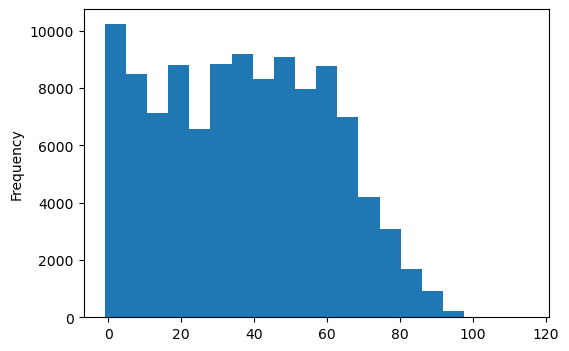

In [36]:
data['Age'].plot(kind='hist', bins=20, figsize=(6,4));

In [48]:
under_one = data[data['Age'] < 1]

In [54]:
under_one.shape

(3540, 14)

In [58]:
under_one['Age'].value_counts()

Age
 0    3539
-1       1
Name: count, dtype: int64

In [5]:
# Find the index of the first row where age < 0
index_to_drop = data[data['Age'] < 0].index[0]
data.drop(index=index_to_drop, inplace=True)

In [100]:
Neighbourhood = data['Neighbourhood'].value_counts()

In [238]:
Neighbourhood.shape

(81,)

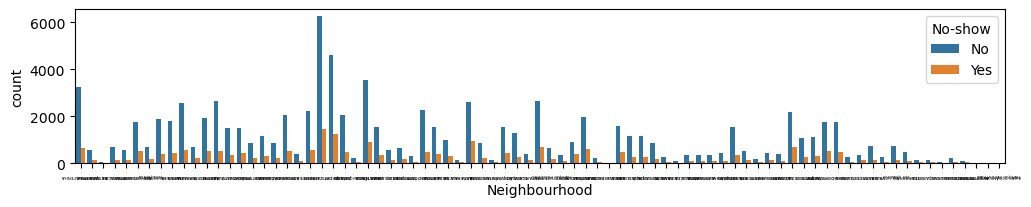

In [242]:
import seaborn as sns
plt.figure(figsize=(12,2))
sns.countplot(data=data, x='Neighbourhood', hue='No-show');
plt.xticks(rotation=180, fontsize=3);
    

In [270]:
#data.boxplot(column='Neighbourhood', by='No-show')


In [110]:
Neighbourhood.max()

7717

In [188]:
data['Scholarship'].value_counts()

Scholarship
0    99665
1    10861
Name: count, dtype: int64

In [190]:
data['Hipertension'].value_counts()

Hipertension
0    88725
1    21801
Name: count, dtype: int64

In [192]:
data['Alcoholism'].value_counts()

Alcoholism
0    107166
1      3360
Name: count, dtype: int64

In [194]:
data['Handcap'].value_counts()

Handcap
0    108285
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [196]:
data['SMS_received'].value_counts()

SMS_received
0    75044
1    35482
Name: count, dtype: int64

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [7]:
data['Day']=pd.to_datetime(data['AppointmentDay']).dt.day_name()

In [120]:
data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday


In [9]:
#convert to datetime 
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.normalize()

In [180]:
data['ScheduledDay'].info()

<class 'pandas.core.series.Series'>
Index: 110526 entries, 0 to 110526
Series name: ScheduledDay
Non-Null Count   Dtype              
--------------   -----              
110526 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 1.7 MB


In [11]:
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.normalize()

In [13]:
data['Lead_Time'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days.fillna(0)

In [15]:
data[['ScheduledDay','AppointmentDay','Day', 'Lead_Time']][:10]

,ScheduledDay,AppointmentDay,Day,Lead_Time
0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,Friday,0
1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,Friday,0
2,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,Friday,0
3,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,Friday,0
4,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,Friday,0
5,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,Friday,2
6,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,Friday,2
7,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,Friday,2
8,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,Friday,0
9,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,Friday,2


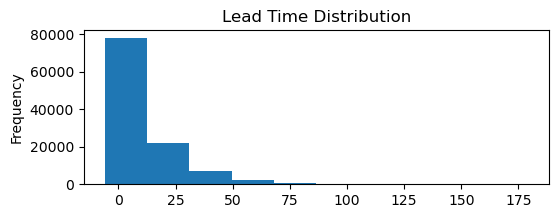

In [21]:
data['Lead_Time'].plot(kind='hist', figsize=(6,2))
plt.title('Lead Time Distribution');

Text(0, 0.5, 'Lead Time (days)')

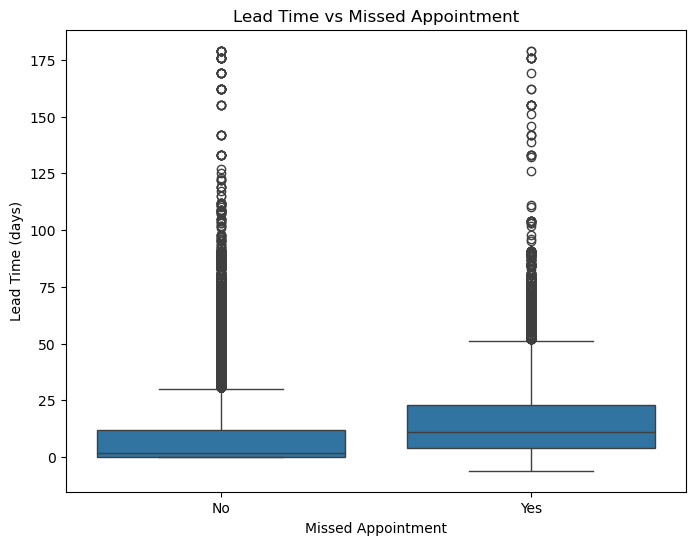

In [31]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='No-show', y='Lead_Time', data=data)
plt.title("Lead Time vs Missed Appointment")
plt.xlabel("Missed Appointment")
plt.ylabel("Lead Time (days)")

In [ ]:
# Group by Neighbourhood and No-show, then count the occurrences
Location_data = data.groupby(['Neighbourhood', 'No-show']).size().reset_index(name='count')

# Pivot the data to have Neighbourhood as index and columns for each 'No-show' status
pivot_data = Location_data.pivot_table(index='Neighbourhood', columns='No-show', values='count', fill_value=0)

# Sort the Neighbourhoods based on the total number of 'Yes' No-shows in descending order
pivot_data['total'] = pivot_data['Yes']+pivot_data['No']
pivot_data['missed_percentage'] = (pivot_data['Yes'] / pivot_data['total'])*100

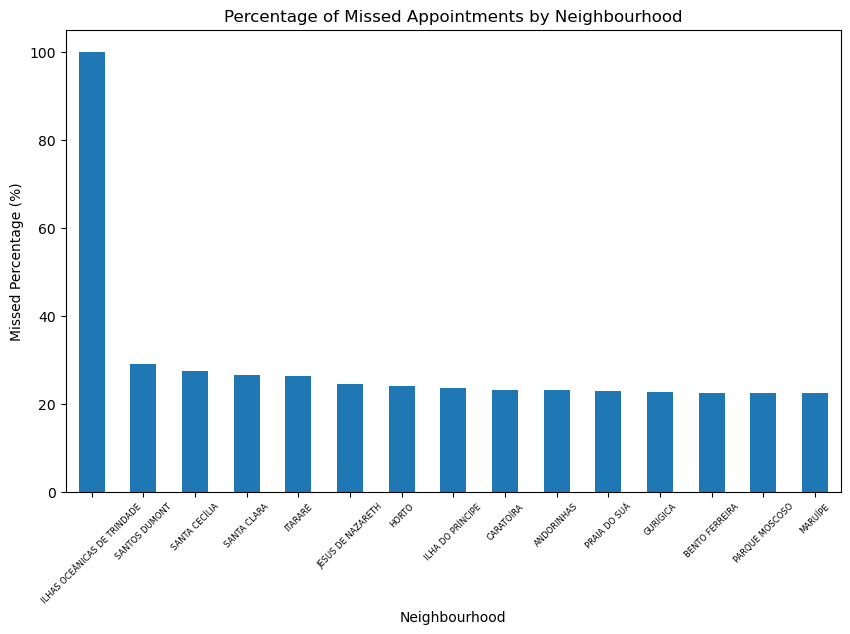

In [294]:

pivot_data['missed_percentage'].sort_values(ascending=False)[:15].plot(kind='bar', figsize=(10,6))
plt.title('Percentage of Missed Appointments by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Missed Percentage (%)') 
plt.xticks(rotation=45, fontsize=6);



In [302]:
pivot_data['missed_percentage'].sort_values(ascending=False)[:1]

Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    100.0
Name: missed_percentage, dtype: float64

In [304]:
Ilhas = data[data['Neighbourhood']=='ILHAS OCEÂNICAS DE TRINDADE']

In [306]:
Ilhas

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day,Lead_Time
48754,5.349869e+11,5583947,F,2016-04-14 00:00:00+00:00,2016-05-13 00:00:00+00:00,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes,Friday,29
48765,7.256430e+12,5583948,F,2016-04-14 00:00:00+00:00,2016-05-13 00:00:00+00:00,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes,Friday,29


#### Relationship between Target and Categorical Variables ####


In [309]:
data['No-show'] = data['No-show'].map({'Yes':1, 'No':0})

In [373]:
categorical = ['Gender', 'Day', 'Handcap', 'SMS_received', 'Scholarship'] 

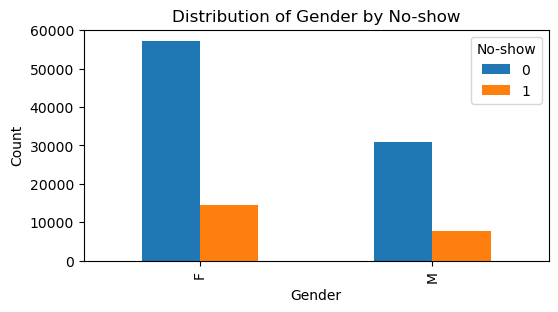

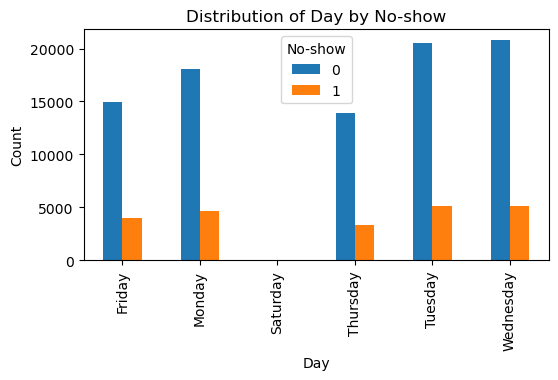

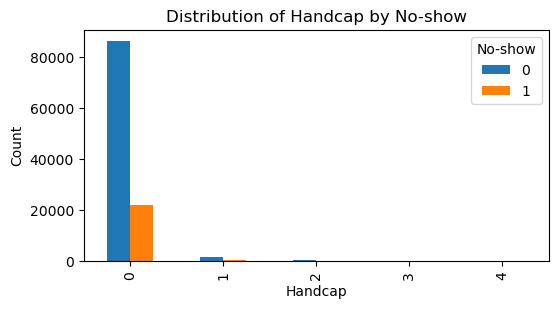

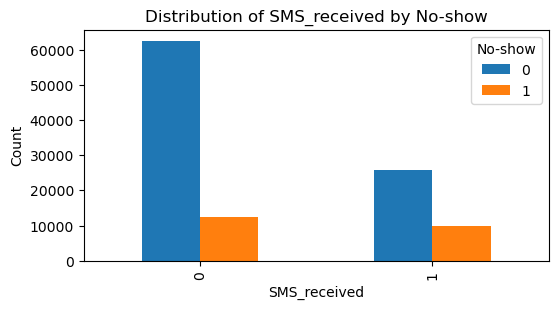

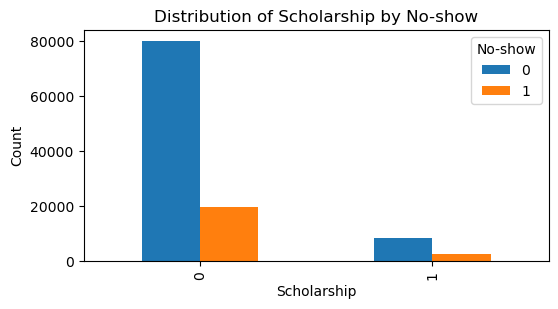

In [375]:
for col in categorical:  
    fig = plt.figure(figsize=(6, 3))
    ax = fig.gca()
    data.groupby([col, 'No-show']).size().unstack().plot(kind='bar', ax=ax)
    ax.set_title('Distribution of ' + col + ' by No-show')
    ax.set_ylabel('Count');

#### Relationship between Target and Health ####

In [377]:
Disease = ['Hipertension','Diabetes', 'Alcoholism']


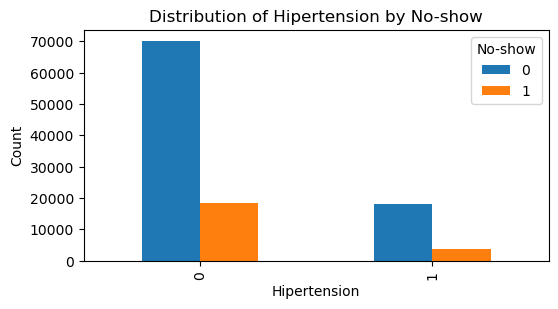

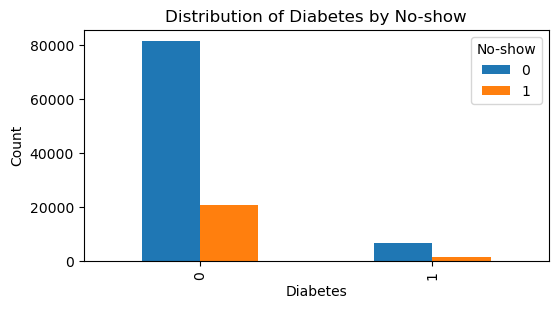

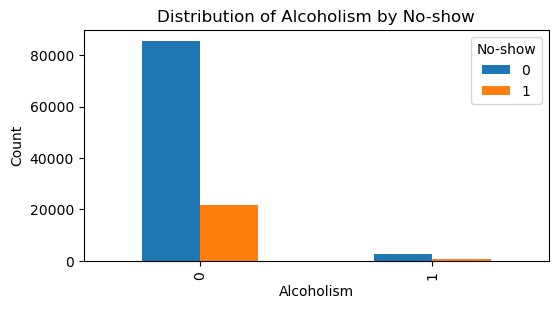

In [383]:
for col in Disease:  
    fig = plt.figure(figsize=(6, 3))
    ax = fig.gca()
    data.groupby([col, 'No-show']).size().unstack().plot(kind='bar', ax=ax)
    ax.set_title('Distribution of ' + col + ' by No-show')
    ax.set_ylabel('Count');

In [39]:
data['Gender']=data['Gender'].map({'M':1, 'F':0})

In [49]:
data['No-show']=data['No-show'].map({'Yes':1, 'No':0})

In [43]:
features = ['Gender', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Lead_Time']

<Axes: >

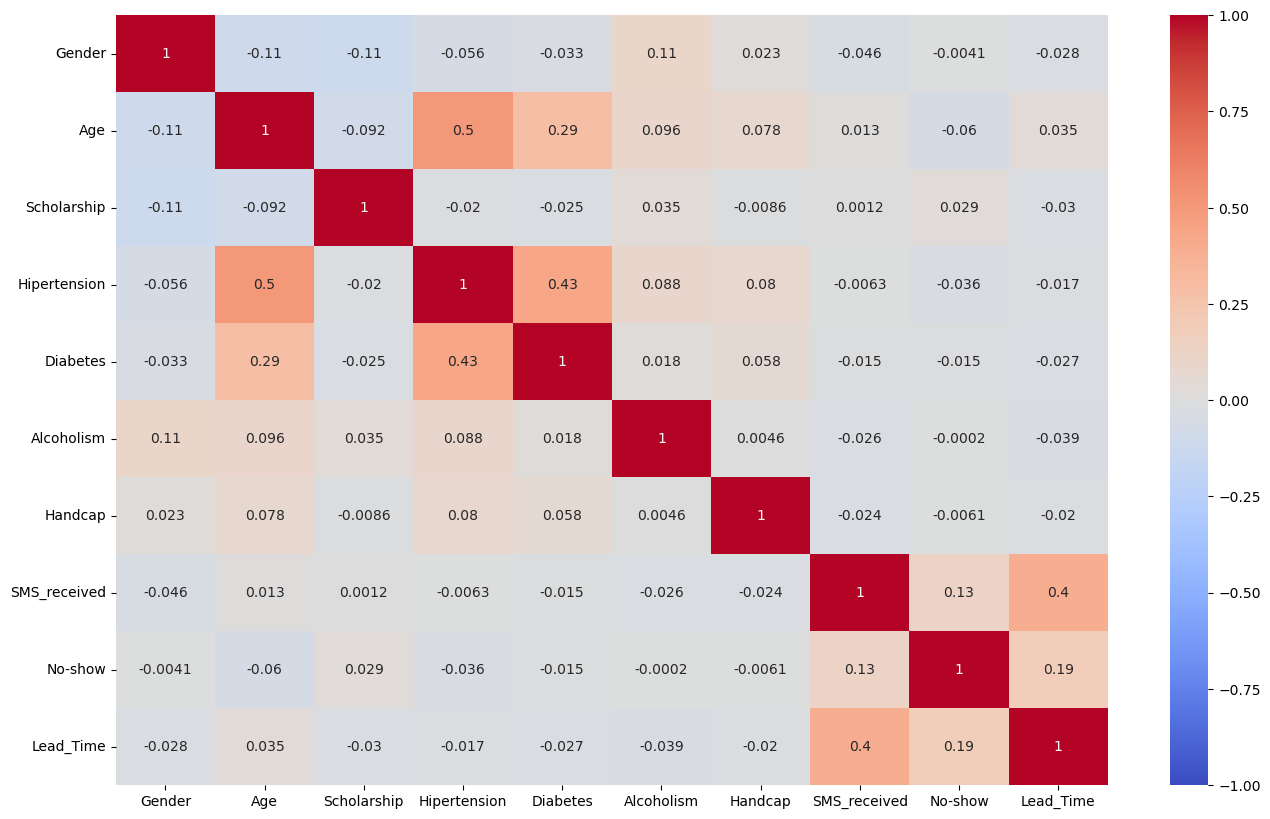

In [51]:
plt.figure(figsize=(16,10))
sns.heatmap(data[features].corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

In [399]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Day',
       'Lead_Time'],
      dtype='object')

In [53]:
y=data['No-show']

In [55]:
features =data[['Gender', 'Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Lead_Time']]

**Normalize Features**

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [59]:
features[['Age', 'Lead_Time']]=scaler.fit_transform(features[['Age', 'Lead_Time']])

C:\Users\maria\AppData\Local\Temp\ipykernel_20224\3251324129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['Age', 'Lead_Time']]=scaler.fit_transform(features[['Age', 'Lead_Time']])


In [61]:
features.head()

,Gender,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Lead_Time
0,0,1.077926,1,0,0,0,0,-0.667572
1,1,0.818297,0,0,0,0,0,-0.667572
2,0,1.077926,0,0,0,0,0,-0.667572
3,0,-1.258733,0,0,0,0,0,-0.667572
4,0,0.818297,1,1,0,0,0,-0.667572


In [63]:
X=features.values

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.22, random_state=0)

In [71]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_y=LR.predict(X_test)

In [73]:
LR_accuracy= accuracy_score(y_test,LR_y)
LR_accuracy

0.797828590228656

In [75]:
LR_confusion = confusion_matrix(y_test, LR_y)
LR_confusion

array([[19315,   171],
       [ 4745,    85]], dtype=int64)

In [77]:
LR_report = classification_report(y_test, LR_y)
print(LR_report)

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     19486
           1       0.33      0.02      0.03      4830

    accuracy                           0.80     24316
   macro avg       0.57      0.50      0.46     24316
weighted avg       0.71      0.80      0.72     24316



In [92]:
%%time
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_y=svm_model.predict(X_test)


0.8013653561441026


In [ ]:
svm_accuracy = accuracy_score(y_test,svm_y)
print(svm_accuracy)

In [94]:
svm_report = classification_report(y_test, svm_y)
print(svm_report)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     19486
           1       0.00      0.00      0.00      4830

    accuracy                           0.80     24316
   macro avg       0.40      0.50      0.44     24316
weighted avg       0.64      0.80      0.71     24316



C:\Users\maria\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\maria\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\maria\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [128]:
%%time 
svm_rbf = SVC(kernel='rbf').fit(X_train, y_train)
svm_rbf_y=svm_rbf.predict(X_test)


CPU times: total: 12min 23s
Wall time: 12min 43s


In [132]:
svm__rbf_accuracy = accuracy_score(y_test,svm_rbf_y)
print(svm__rbf_accuracy)

0.8014476065142293


In [ ]:
rbf_report = classification_report(y_test, svm_rbf_y)
print(rbf_report)

In [148]:
#tree = DecisionTreeRegessor()

tree=DecisionTreeRegressor(max_depth=6)
tree.fit(X_train, y_train)
y_tree= tree.predict(X_test)



In [150]:
#tree_accuracy = accuracy_score(y_test, y_tree)
#tree_accuracy

In [138]:
y_tree[:10]

array([0.        , 0.5       , 0.01526718, 0.01666667, 0.25      ,
       0.06493506, 0.11111111, 0.5       , 0.        , 0.05128205])

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_tree)
r2 = r2_score(y_test, y_tree)

print("Mean Squared Error:", mse)
print("R^2 score:", r2)
#tree_accuracy = accuracy_score(y_test, y_tree)
#tree_accuracy

Mean Squared Error: 0.19728745999315583
R^2 score: -0.23940693510421807


In [110]:
%%time
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf= rf.predict(X_test)



CPU times: total: 6.06 s
Wall time: 6.23 s


In [112]:
rf_accuracy = accuracy_score(y_test, y_rf)
rf_accuracy 

0.7682184569830565

In [114]:
rf_report = classification_report(y_test, y_rf)
print(rf_report)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     19486
           1       0.34      0.18      0.24      4830

    accuracy                           0.77     24316
   macro avg       0.58      0.55      0.55     24316
weighted avg       0.72      0.77      0.74     24316



In [116]:
importances = rf.feature_importances_

# Convert into a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': features.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

        feature  importance
7     Lead_Time    0.532806
1           Age    0.412293
6  SMS_received    0.021112
0        Gender    0.009590
5       Handcap    0.007615
2  Hipertension    0.006948
4    Alcoholism    0.005214
3      Diabetes    0.004421


In [120]:
lasso = LogisticRegression(penalty='l1', solver='saga', C=0.01)  # Adjust C for regularization strength
lasso.fit(X_train, y_train)

# Get coefficients
lasso_coefficients = pd.DataFrame({
    'feature': features.columns,
    'coefficient': lasso.coef_[0]
}).sort_values(by='coefficient', ascending=False)


In [122]:
lasso_coefficients[:7]

,feature,coefficient
7,Lead_Time,0.345381
6,SMS_received,0.327525
4,Alcoholism,0.002804
0,Gender,0.000000
2,Hipertension,0.000000
3,Diabetes,0.000000
5,Handcap,0.000000


In [124]:
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)  # Number of features you want to select
fit = rfe.fit(X_train, y_train)

# Check selected features
selected_features = features.columns[fit.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Diabetes', 'Alcoholism', 'SMS_received', 'Lead_Time'], dtype='object')
